<a href="https://colab.research.google.com/github/jumafernandez/generacion_prompts/blob/main/semana3/stable_diffusion_img2img.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **🖼️ Generación de imágenes con Img2Img en Stable Diffusion**

## **📌 Descripción de la Notebook**
Esta notebook explora el uso de **Img2Img en Stable Diffusion**, una técnica que permite **modificar imágenes existentes utilizando prompts**.  

A diferencia del método tradicional, donde se genera una imagen desde cero, **Img2Img toma una imagen base y la transforma progresivamente**, agregando detalles y ajustando su apariencia de acuerdo con la descripción textual proporcionada.

✔️ **Cargaremos una imagen base**.  
✔️ **Aplicaremos modificaciones iterativas** usando diferentes prompts.  
✔️ **Compararemos visualmente las versiones generadas** para analizar el impacto del refinamiento del prompt.  

🎨 **Ideal para mejorar imágenes generadas, explorar variaciones y experimentar con la creatividad asistida por IA.** 🚀

## **1️⃣ Instalar dependencias necesarias**
En caso que Google Colab o tu entorno de trabajo no tenga **Stable Diffusion** preinstalado, es necesario instalarlo manualmente así como las librerías para aceleradoras gráficas:

In [1]:
#!pip install diffusers transformers xformers accelerate --quiet

!pip install --upgrade torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118 --quiet

In [2]:
!pip install xformers accelerate --quiet

📌 Importamos las librerías necesarias:

In [3]:
from diffusers import StableDiffusionPipeline, StableDiffusionImg2ImgPipeline
import torch
from PIL import Image
from IPython.display import display

## **2️⃣ Habilitar GPU en Colab**
Antes de ejecutar esta notebook, asegúrate de activar la GPU en Colab:
- Ve a **Entorno de ejecución** → **Cambiar tipo de entorno de ejecución**.
- Selecciona **GPU** en la opción de **Acelerador por hardware**.
- Guarda los cambios.

In [4]:
import torch

# Verificar si Colab tiene acceso a una GPU
print(torch.cuda.is_available())  # Debe devolver True
if torch.cuda.is_available():
    print(torch.cuda.get_device_name(0))  # Nombre de la GPU asignada

False


## **3️⃣ Cargar Stable Diffusion y configurar GPU**
Ahora cargamos el modelo y lo enviamos a la GPU para acelerar la inferencia.


In [5]:
from diffusers import StableDiffusionPipeline

device = "cuda" if torch.cuda.is_available() else "cpu"

text2img_pipe = StableDiffusionPipeline.from_pretrained("CompVis/stable-diffusion-v1-4").to(device)
img2img_pipe = StableDiffusionImg2ImgPipeline.from_pretrained("CompVis/stable-diffusion-v1-4").to(device)

# 📌 Optimizar memoria para inferencia más rápida en GPU
if torch.cuda.is_available():
    text2img_pipe.enable_xformers_memory_efficient_attention()
    img2img_pipe.enable_xformers_memory_efficient_attention()

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 16 files:   0%|          | 0/16 [00:00<?, ?it/s]

(…)kpoints/scheduler_config-checkpoint.json:   0%|          | 0.00/209 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

safety_checker/config.json:   0%|          | 0.00/4.56k [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/313 [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/592 [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/551 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

 ## **4️⃣ Generar una imagen base con un prompt**

En esta celda generamos una imagen desde cero con un prompt inicial que luego servirá de base para nuestras modificaciones posteriores.

In [6]:
prompt_base = "A futuristic city at sunset, ultra detailed, beautiful skyline"

  0%|          | 0/50 [00:00<?, ?it/s]

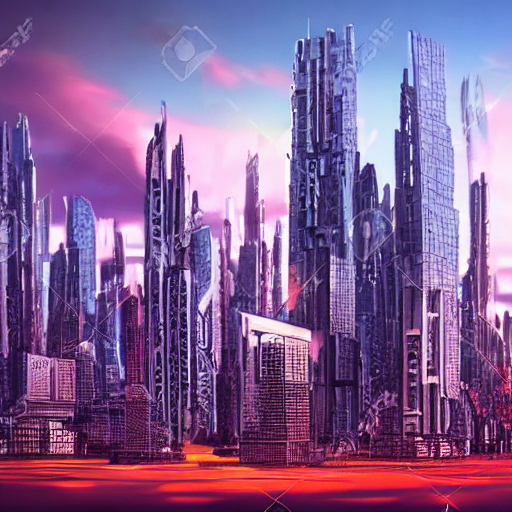

In [7]:
init_image = text2img_pipe(prompt_base, num_inference_steps=50).images[0]

# 📌 Guardar la imagen base para futuras iteraciones
init_image.save("base_image.png")

# 📌 Mostrar la imagen base
display(init_image)

💡 Esta imagen es completamente generada por IA y servirá como punto de partida para el refinamiento.

## **5️⃣ Primera modificación de la imagen con Img2Img**
Usaremos el primer prompt para agregar detalles sin modificar demasiado la imagen original.

In [8]:
prompt1 = "A futuristic city at sunset with neon lights, ultra detailed"

  0%|          | 0/25 [00:00<?, ?it/s]

🖼️ Primera modificación basada en la imagen inicial:


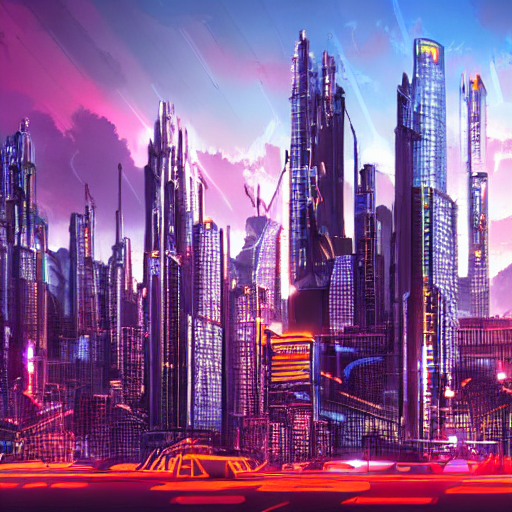

In [9]:
# 📌 Generar la imagen modificada con fuerza 0.5 (cambia parcialmente)
image1 = img2img_pipe(prompt1, image=init_image, strength=0.5).images[0]

# 📌 Mostrar la imagen generada
print("🖼️ Primera modificación basada en la imagen inicial:")
display(image1)

💡 El parámetro strength=0.5 controla cuánto se transforma la imagen base:
- Valores bajos (\~0.3 - 0.5) mantienen la estructura original.
- Valores altos (\~0.7 - 1.0) permiten cambios más drásticos.

## **6️⃣ Segunda iteración con ajustes en el prompt**

Ajustamos el prompt para agregar más detalles y ver cómo afecta la imagen:

  0%|          | 0/35 [00:00<?, ?it/s]

🖼️ Segunda iteración con más detalles:


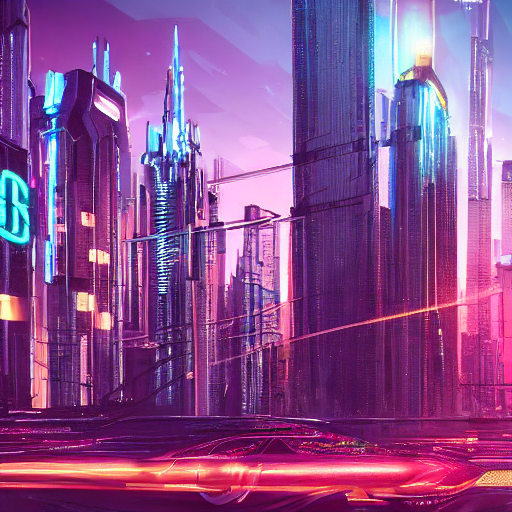

In [10]:
# 📌 Refinar aún más la imagen con un nuevo prompt
prompt2 = "A futuristic city at sunset, neon lights, flying cars, high detail, cinematic lighting"

# 📌 Generar una nueva versión con más cambios (strength = 0.7)
image2 = img2img_pipe(prompt2, image=image1, strength=0.7).images[0]

# 📌 Mostrar la nueva imagen generada
print("🖼️ Segunda iteración con más detalles:")
display(image2)

📌 Aquí aumentamos strength=0.7, lo que hace que la imagen se modifique aún más sin perder completamente su estructura original.